In [59]:
import pandas as pd
import requests
import numpy as np
# from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import keras
# from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [60]:
res = requests.get("https://ai-emp-fog-comp.herokuapp.com/raw-data")
response = res.json()

In [61]:
df = pd.DataFrame.from_dict(response["raw_data"])

In [62]:
df.columns

Index(['timestep_time', 'vehicle_0_pos', 'vehicle_1_pos', 'vehicle_10_pos',
       'vehicle_11_pos', 'vehicle_12_pos', 'vehicle_13_pos', 'vehicle_14_pos',
       'vehicle_15_pos', 'vehicle_16_pos', 'vehicle_17_pos', 'vehicle_19_pos',
       'vehicle_2_pos', 'vehicle_4_pos', 'vehicle_5_pos', 'vehicle_6_pos',
       'vehicle_7_pos', 'vehicle_8_pos', 'vehicle_0_speed', 'vehicle_1_speed',
       'vehicle_10_speed', 'vehicle_11_speed', 'vehicle_12_speed',
       'vehicle_13_speed', 'vehicle_14_speed', 'vehicle_15_speed',
       'vehicle_16_speed', 'vehicle_17_speed', 'vehicle_19_speed',
       'vehicle_2_speed', 'vehicle_4_speed', 'vehicle_5_speed',
       'vehicle_6_speed', 'vehicle_7_speed', 'vehicle_8_speed'],
      dtype='object')

In [63]:
# dropping timestep_time column
df.drop(columns =  "timestep_time", inplace = True)

In [64]:
df

,vehicle_0_pos,vehicle_1_pos,vehicle_10_pos,vehicle_11_pos,vehicle_12_pos,vehicle_13_pos,vehicle_14_pos,vehicle_15_pos,vehicle_16_pos,vehicle_17_pos,vehicle_19_pos,vehicle_2_pos,vehicle_4_pos,vehicle_5_pos,vehicle_6_pos,vehicle_7_pos,vehicle_8_pos,vehicle_0_speed,vehicle_1_speed,vehicle_10_speed,vehicle_11_speed,vehicle_12_speed,vehicle_13_speed,vehicle_14_speed,vehicle_15_speed,vehicle_16_speed,vehicle_17_speed,vehicle_19_speed,vehicle_2_speed,vehicle_4_speed,vehicle_5_speed,vehicle_6_speed,vehicle_7_speed,vehicle_8_speed
0,643.23,362.75,476.04,551.59,441.71,113.18,383.10,167.00,203.39,104.06,200.55,186.78,99.19,55.45,30.70,18.04,5.10,12.13,6.92,9.78,13.06,11.07,3.06,12.14,4.94,6.72,3.66,10.55,11.54,6.16,6.93,4.33,5.77,0.00
1,655.90,370.55,486.83,564.90,452.88,116.03,395.42,171.63,211.02,108.27,211.44,199.25,103.51,61.61,36.01,24.82,6.55,12.66,7.80,10.79,13.31,11.16,2.85,12.32,4.62,7.63,4.21,10.88,12.47,4.32,6.16,5.32,6.78,1.45
2,668.23,378.11,497.09,578.71,464.19,119.14,406.73,177.03,218.35,111.52,222.21,211.16,107.05,67.78,40.62,32.47,9.50,12.33,7.56,10.26,13.82,11.31,3.11,11.31,5.40,7.33,3.25,10.77,11.91,3.54,6.17,4.61,7.65,2.94
3,679.96,385.32,507.35,591.86,475.16,122.11,419.15,181.79,225.11,115.34,232.95,223.58,110.50,75.01,45.28,39.39,15.02,11.73,7.21,10.26,13.15,10.97,2.98,12.42,4.76,6.76,3.82,10.75,12.41,3.44,7.24,4.65,6.92,5.52
4,692.82,393.16,517.24,604.84,486.88,124.68,431.39,186.27,231.74,118.68,243.81,235.65,113.74,81.46,49.98,46.90,22.57,12.86,7.84,9.88,12.98,11.72,2.57,12.24,4.48,6.63,3.34,10.86,12.07,3.24,6.45,4.71,7.51,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,18785.21,10987.21,15560.36,20080.52,16735.93,4163.02,17634.01,7581.01,10819.13,5754.26,16258.77,17530.55,13886.35,9958.51,6975.33,10847.61,10493.85,12.83,7.22,10.45,12.74,11.49,3.37,11.54,4.87,7.22,3.52,10.43,12.17,9.67,6.62,5.31,7.81,7.16
1467,18797.48,10993.97,15570.24,20094.18,16747.63,4165.77,17645.92,7585.58,10826.09,5758.25,16269.75,17542.32,13895.69,9965.89,6980.47,10854.97,10500.88,12.27,6.76,9.88,13.66,11.70,2.75,11.91,4.57,6.96,3.99,10.97,11.76,9.33,7.38,5.14,7.36,7.03
1468,18810.39,11001.14,15581.03,20107.73,16759.24,4168.38,17658.19,7590.28,10832.69,5762.43,16281.01,17553.85,13905.24,9972.27,6985.84,10862.77,10508.60,12.91,7.17,10.79,13.55,11.60,2.61,12.27,4.70,6.60,4.18,11.26,11.54,9.55,6.38,5.37,7.80,7.72
1469,18822.92,11008.17,15591.24,20121.57,16770.22,4170.74,17670.61,7594.98,10840.15,5766.54,16292.60,17565.16,13914.10,9979.05,6990.34,10870.22,10515.70,12.53,7.03,10.21,13.84,10.98,2.35,12.42,4.70,7.46,4.11,11.59,11.31,8.87,6.78,4.50,7.45,7.11


In [65]:
df.isnull().sum()

vehicle_0_pos       0
vehicle_1_pos       0
vehicle_10_pos      0
vehicle_11_pos      0
vehicle_12_pos      0
vehicle_13_pos      0
vehicle_14_pos      0
vehicle_15_pos      0
vehicle_16_pos      0
vehicle_17_pos      0
vehicle_19_pos      0
vehicle_2_pos       0
vehicle_4_pos       0
vehicle_5_pos       0
vehicle_6_pos       0
vehicle_7_pos       0
vehicle_8_pos       0
vehicle_0_speed     0
vehicle_1_speed     0
vehicle_10_speed    0
vehicle_11_speed    0
vehicle_12_speed    0
vehicle_13_speed    0
vehicle_14_speed    0
vehicle_15_speed    0
vehicle_16_speed    0
vehicle_17_speed    0
vehicle_19_speed    0
vehicle_2_speed     0
vehicle_4_speed     0
vehicle_5_speed     0
vehicle_6_speed     0
vehicle_7_speed     0
vehicle_8_speed     0
dtype: int64

In [66]:
# speed
df_speed=df.iloc[:,17:]
df_speed

,vehicle_0_speed,vehicle_1_speed,vehicle_10_speed,vehicle_11_speed,vehicle_12_speed,vehicle_13_speed,vehicle_14_speed,vehicle_15_speed,vehicle_16_speed,vehicle_17_speed,vehicle_19_speed,vehicle_2_speed,vehicle_4_speed,vehicle_5_speed,vehicle_6_speed,vehicle_7_speed,vehicle_8_speed
0,12.13,6.92,9.78,13.06,11.07,3.06,12.14,4.94,6.72,3.66,10.55,11.54,6.16,6.93,4.33,5.77,0.00
1,12.66,7.80,10.79,13.31,11.16,2.85,12.32,4.62,7.63,4.21,10.88,12.47,4.32,6.16,5.32,6.78,1.45
2,12.33,7.56,10.26,13.82,11.31,3.11,11.31,5.40,7.33,3.25,10.77,11.91,3.54,6.17,4.61,7.65,2.94
3,11.73,7.21,10.26,13.15,10.97,2.98,12.42,4.76,6.76,3.82,10.75,12.41,3.44,7.24,4.65,6.92,5.52
4,12.86,7.84,9.88,12.98,11.72,2.57,12.24,4.48,6.63,3.34,10.86,12.07,3.24,6.45,4.71,7.51,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,12.83,7.22,10.45,12.74,11.49,3.37,11.54,4.87,7.22,3.52,10.43,12.17,9.67,6.62,5.31,7.81,7.16
1467,12.27,6.76,9.88,13.66,11.70,2.75,11.91,4.57,6.96,3.99,10.97,11.76,9.33,7.38,5.14,7.36,7.03
1468,12.91,7.17,10.79,13.55,11.60,2.61,12.27,4.70,6.60,4.18,11.26,11.54,9.55,6.38,5.37,7.80,7.72
1469,12.53,7.03,10.21,13.84,10.98,2.35,12.42,4.70,7.46,4.11,11.59,11.31,8.87,6.78,4.50,7.45,7.11


In [81]:
# position
df_pos=df.iloc[:,:17]
df_pos

,vehicle_0_pos,vehicle_1_pos,vehicle_10_pos,vehicle_11_pos,vehicle_12_pos,vehicle_13_pos,vehicle_14_pos,vehicle_15_pos,vehicle_16_pos,vehicle_17_pos,vehicle_19_pos,vehicle_2_pos,vehicle_4_pos,vehicle_5_pos,vehicle_6_pos,vehicle_7_pos,vehicle_8_pos
0,643.23,362.75,476.04,551.59,441.71,113.18,383.10,167.00,203.39,104.06,200.55,186.78,99.19,55.45,30.70,18.04,5.10
1,655.90,370.55,486.83,564.90,452.88,116.03,395.42,171.63,211.02,108.27,211.44,199.25,103.51,61.61,36.01,24.82,6.55
2,668.23,378.11,497.09,578.71,464.19,119.14,406.73,177.03,218.35,111.52,222.21,211.16,107.05,67.78,40.62,32.47,9.50
3,679.96,385.32,507.35,591.86,475.16,122.11,419.15,181.79,225.11,115.34,232.95,223.58,110.50,75.01,45.28,39.39,15.02
4,692.82,393.16,517.24,604.84,486.88,124.68,431.39,186.27,231.74,118.68,243.81,235.65,113.74,81.46,49.98,46.90,22.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,18785.21,10987.21,15560.36,20080.52,16735.93,4163.02,17634.01,7581.01,10819.13,5754.26,16258.77,17530.55,13886.35,9958.51,6975.33,10847.61,10493.85
1467,18797.48,10993.97,15570.24,20094.18,16747.63,4165.77,17645.92,7585.58,10826.09,5758.25,16269.75,17542.32,13895.69,9965.89,6980.47,10854.97,10500.88
1468,18810.39,11001.14,15581.03,20107.73,16759.24,4168.38,17658.19,7590.28,10832.69,5762.43,16281.01,17553.85,13905.24,9972.27,6985.84,10862.77,10508.60
1469,18822.92,11008.17,15591.24,20121.57,16770.22,4170.74,17670.61,7594.98,10840.15,5766.54,16292.60,17565.16,13914.10,9979.05,6990.34,10870.22,10515.70


In [67]:
# speed
# splitting train/test data
train_df = df_speed.iloc[:1200, :]
test_df = df_speed.iloc[1200:, :]


In [68]:
print(train_df.shape)
print(test_df.shape)

(1200, 17)
(271, 17)


In [83]:
# position
# splitting train/test data
train_df_pos = df_pos.iloc[:1200, :]
test_df_pos = df_pos.iloc[1200:, :]


In [84]:
print(train_df_pos.shape)
print(test_df_pos.shape)

(1200, 17)
(271, 17)


In [69]:
# speed
# Applying the vector normalization to better trainby our model
transformer = Normalizer().fit(train_df)  # fit does nothing.
train_df_scale = transformer.transform(train_df)
test_df_scale = transformer.transform(test_df)

In [85]:
# position
transformer = Normalizer().fit(train_df_pos)  # fit does nothing.
train_df_scale_pos = transformer.transform(train_df_pos)
test_df_scale_pos = transformer.transform(test_df_pos)

In [70]:
# speed
train_df_scale

array([[0.34929552, 0.19926834, 0.28162491, ..., 0.12468669, 0.16615294,
        0.        ],
       [0.35068199, 0.21605999, 0.29888299, ..., 0.14736399, 0.18780599,
        0.040165  ],
       [0.34718514, 0.21287264, 0.28889858, ..., 0.12980726, 0.21540684,
        0.0827838 ],
       ...,
       [0.32537577, 0.17979863, 0.26453756, ..., 0.12357761, 0.20913134,
        0.20071176],
       [0.33595809, 0.19366679, 0.26817471, ..., 0.11028248, 0.18936309,
        0.205233  ],
       [0.33888736, 0.19673928, 0.27585695, ..., 0.11050101, 0.20227751,
        0.1732677 ]])

In [86]:
# position
train_df_scale_pos

array([[0.50847341, 0.28675393, 0.37630969, ..., 0.02426835, 0.01426062,
        0.00403155],
       [0.50526704, 0.28545007, 0.37502539, ..., 0.02774   , 0.01911988,
        0.00504574],
       [0.50214967, 0.28413542, 0.37354441, ..., 0.0305244 , 0.02439998,
        0.00713889],
       ...,
       [0.33984597, 0.19873086, 0.28130744, ..., 0.1253491 , 0.19465598,
        0.18842457],
       [0.3398431 , 0.1987269 , 0.28129696, ..., 0.12533669, 0.19465205,
        0.18843869],
       [0.33984257, 0.19872518, 0.28129288, ..., 0.12532444, 0.19465833,
        0.18842621]])

In [71]:
# speed
test_df_scale

array([[0.33724332, 0.19866115, 0.25927416, ..., 0.13991726, 0.20693869,
        0.19518992],
       [0.32963358, 0.19600561, 0.26725594, ..., 0.11050522, 0.21536419,
        0.21025568],
       [0.3270624 , 0.2034757 , 0.2670116 , ..., 0.13618664, 0.20052678,
        0.18390558],
       ...,
       [0.34088461, 0.18932166, 0.28490666, ..., 0.14179321, 0.20595662,
        0.20384424],
       [0.33603502, 0.18853361, 0.27381624, ..., 0.12068297, 0.19979736,
        0.19067909],
       [0.3220287 , 0.19741641, 0.26340366, ..., 0.14397219, 0.19441699,
        0.19550769]])

In [87]:
# position
test_df_scale_pos

array([[0.33984076, 0.19872532, 0.28127483, ..., 0.12533676, 0.19466882,
        0.18843194],
       [0.33983281, 0.19872332, 0.28126371, ..., 0.12532481, 0.19468591,
        0.18844994],
       [0.33982271, 0.1987274 , 0.28125234, ..., 0.12533381, 0.19469087,
        0.18844641],
       ...,
       [0.33875208, 0.19811706, 0.28059526, ..., 0.12580642, 0.19562518,
        0.18924701],
       [0.33875045, 0.19811074, 0.28059088, ..., 0.12580306, 0.19562809,
        0.1892479 ],
       [0.33873979, 0.1981105 , 0.28058002, ..., 0.12581518, 0.19562751,
        0.18925224]])

In [88]:
# prepare data to be fed into the LSTM/RNN/GRU model
def create_dataset(data, steps):
  features, labels = [], []
  for i in range(len(data)-steps):
    data_seq = data[i: i+steps, :]
    features.append(data_seq)

    seq_label = data[i+steps, :]
    labels.append(seq_label)

  return np.array(features), np.array(labels)

In [73]:
# speed
TIME_STEPS = 2

train_features, train_labels = create_dataset(train_df_scale, TIME_STEPS)
test_features, test_labels = create_dataset(test_df_scale, TIME_STEPS)

In [89]:
# position
train_features_pos, train_labels_pos = create_dataset(train_df_scale_pos, TIME_STEPS)
test_features_pos, test_labels_pos = create_dataset(test_df_scale_pos, TIME_STEPS)

In [105]:
# speed
from keras.backend import dropout
model_s = keras.models.Sequential()
model_s.add(keras.layers.LSTM(17, input_shape=(train_features.shape[1], train_features.shape[2]),activation="relu" ,return_sequences=True) )
model_s.add(keras.layers.LSTM(8))
model_s.add(keras.layers.Dense(17))

model_s.compile(optimizer='adam', loss=['mse'])


In [110]:
# position
from keras.backend import dropout
model_p = keras.models.Sequential()
model_p.add(keras.layers.LSTM(17, input_shape=(train_features.shape[1], train_features.shape[2]),activation="relu" ,return_sequences=True) )
model_p.add(keras.layers.LSTM(8))
model_p.add(keras.layers.Dense(17))

model_p.compile(optimizer='adam', loss=['mse'])


In [107]:
# fitting model for speed
history_s = model_s.fit(train_features, train_labels, batch_size=64, epochs=120, shuffle=False, validation_split=.12)


Epoch 1/120
17/17 [==============================] - 4s 41ms/step - loss: 0.0524 - val_loss: 0.0449
Epoch 2/120
17/17 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0301
Epoch 3/120
17/17 [==============================] - 0s 6ms/step - loss: 0.0235 - val_loss: 0.0166
Epoch 4/120
17/17 [==============================] - 0s 6ms/step - loss: 0.0131 - val_loss: 0.0096
Epoch 5/120
17/17 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0053
Epoch 6/120
17/17 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 7/120
17/17 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 8/120
17/17 [==============================] - 0s 5ms/step - loss: 9.3483e-04 - val_loss: 5.5767e-04
Epoch 9/120
17/17 [==============================] - 0s 7ms/step - loss: 4.1220e-04 - val_loss: 2.3957e-04
Epoch 10/120
17/17 [==============================] - 0s 6ms/step - loss: 2.0704e-04 - val_l

In [111]:
# fitting model for position
history_p = model_p.fit(train_features_pos, train_labels_pos, batch_size=64, epochs=120, shuffle=False, validation_split=.12)


Epoch 1/120
17/17 [==============================] - 3s 42ms/step - loss: 0.0525 - val_loss: 0.0460
Epoch 2/120
17/17 [==============================] - 0s 5ms/step - loss: 0.0399 - val_loss: 0.0322
Epoch 3/120
17/17 [==============================] - 0s 5ms/step - loss: 0.0251 - val_loss: 0.0169
Epoch 4/120
17/17 [==============================] - 0s 6ms/step - loss: 0.0115 - val_loss: 0.0067
Epoch 5/120
17/17 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0021
Epoch 6/120
17/17 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 5.4359e-04
Epoch 7/120
17/17 [==============================] - 0s 6ms/step - loss: 5.0783e-04 - val_loss: 1.7194e-04
Epoch 8/120
17/17 [==============================] - 0s 5ms/step - loss: 3.4276e-04 - val_loss: 9.9553e-05
Epoch 9/120
17/17 [==============================] - 0s 5ms/step - loss: 3.0984e-04 - val_loss: 8.4429e-05
Epoch 10/120
17/17 [==============================] - 0s 6ms/step - loss: 3.0412

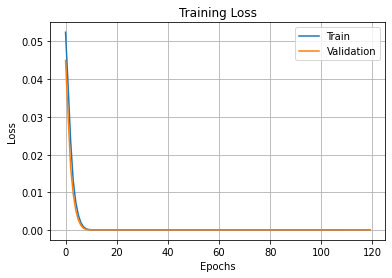

In [113]:
# speed
plt.plot(history_s.history['loss'], label='Train')
plt.plot(history_s.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

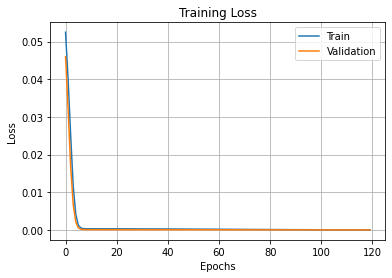

In [112]:
# position
plt.plot(history_p.history['loss'], label='Train')
plt.plot(history_p.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

In [115]:
# speed
# predicting on test data
prediction_speed = model_s.predict(test_features)
prediction_speed

array([[0.33323783, 0.1933647 , 0.27741906, ..., 0.12735605, 0.1975412 ,
        0.1943886 ],
       [0.33361217, 0.194326  , 0.2769258 , ..., 0.12779722, 0.19734186,
        0.19398955],
       [0.3340264 , 0.19433258, 0.2775404 , ..., 0.12774876, 0.19818088,
        0.19489114],
       ...,
       [0.33364785, 0.19373384, 0.2782778 , ..., 0.12746564, 0.19868734,
        0.19467796],
       [0.33321613, 0.19422136, 0.27711177, ..., 0.12719227, 0.19772187,
        0.1937594 ],
       [0.33399627, 0.1947541 , 0.2769155 , ..., 0.12707344, 0.19695476,
        0.1936634 ]], dtype=float32)

In [116]:
# position
# predicting on test data
prediction_pos = model_p.predict(test_features_pos)
prediction_pos

array([[0.34353837, 0.19915463, 0.28312975, ..., 0.12664948, 0.19435461,
        0.1872764 ],
       [0.34353742, 0.19915399, 0.28312787, ..., 0.12665004, 0.19435696,
        0.1872767 ],
       [0.3435386 , 0.1991541 , 0.28312778, ..., 0.12665015, 0.1943592 ,
        0.18727823],
       ...,
       [0.34351477, 0.19913267, 0.28294817, ..., 0.12671745, 0.19467042,
        0.18732615],
       [0.3435143 , 0.19913271, 0.2829477 , ..., 0.12671742, 0.1946715 ,
        0.18732622],
       [0.34351438, 0.19913282, 0.28294808, ..., 0.12671724, 0.19467193,
        0.18732688]], dtype=float32)

In [118]:
# speed
cols_s=df_speed.columns
cols_s=list(cols_s)

In [119]:
# position
cols_p=df_pos.columns
cols_p=list(cols_p)

In [56]:
#   plt.grid()
#   plt.plot(test_df_scale_pos[:, cols.index('vehicle_4_pos')], color='blue', label='Actual')
#   plt.plot(prediction[:, cols.index('vehicle_4_pos')], color='red', label='Predicted')
#   plt.legend()

In [57]:
# plt.figure(figsize=(25, 35), dpi=88)

# for i,col in enumerate(cols):
#   plt.title('Comparison between Actual and Predicted values')

#   plt.subplot(len(cols), 1, i+1)
#   plt.grid()
#   plt.plot(test_df_scale_pos[:, cols.index(col)], color='blue', label='Actual')
#   plt.plot(prediction[:, cols.index(col)], color='red', label='Predicted')
#   plt.legend()
#   i+=1

# plt.xlabel('Time')
# plt.show()


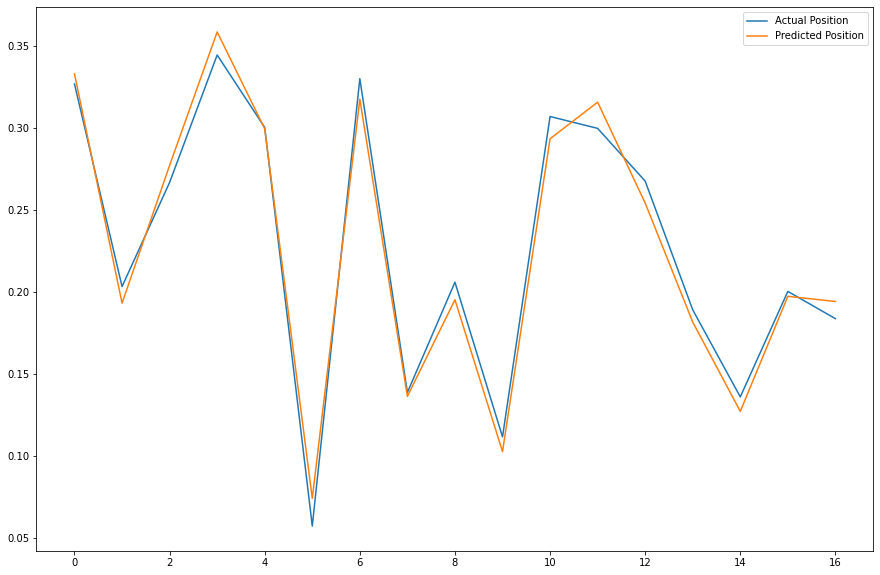

In [129]:
# speed graph with test labels
plt.figure(figsize=(15,10))
plt.plot(test_labels[0, :17], label='Actual Position');
plt.plot(prediction_speed[0, :17], label='Predicted Position');
plt.legend()

In [122]:
model_s.save('speed_lstm.h5')

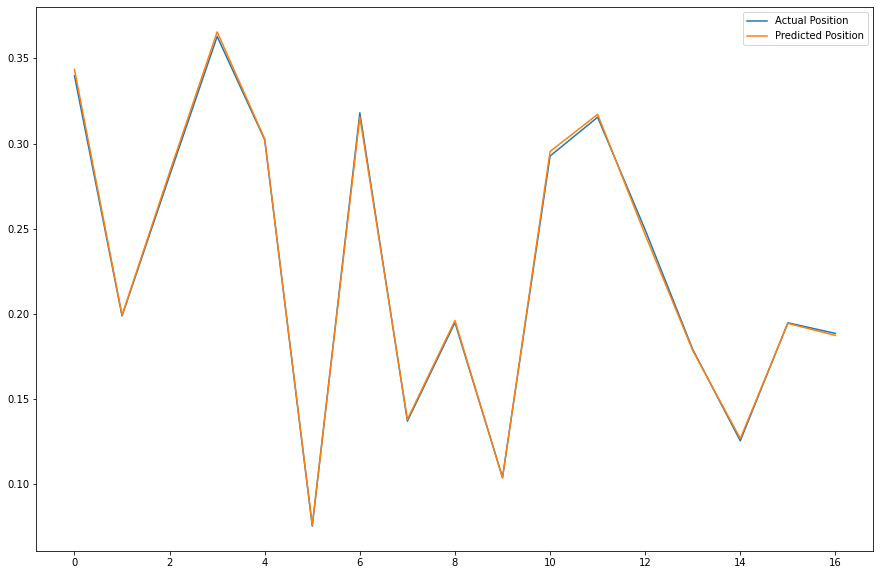

In [128]:
# position graph with test labels
plt.figure(figsize=(15,10))
plt.plot(test_labels_pos[0, :17], label='Actual Position');
plt.plot(prediction_pos[0, :17], label='Predicted Position');
plt.legend()

In [123]:
model_p.save('position_lstm.h5')